detected contours: 7
contour: (8, 1, 2) (8, 2)
contour: (5, 1, 2) (5, 2)
contour: (3, 1, 2) (3, 2)
contour: (6, 1, 2) (6, 2)
contour: (4, 1, 2) (4, 2)
contour: (4, 1, 2) (4, 2)
contour: (3, 1, 2) (3, 2)


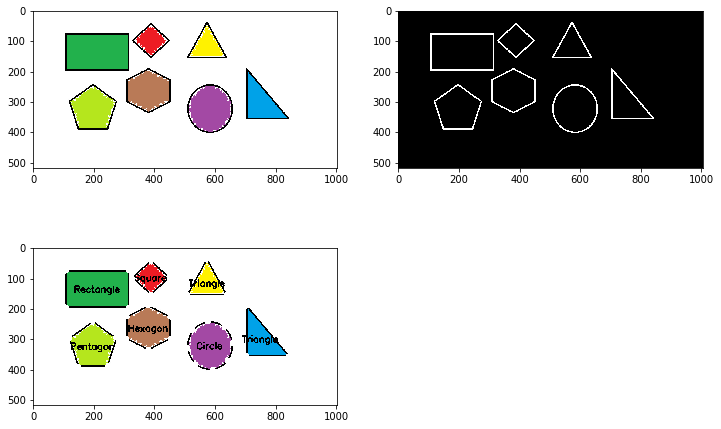

In [6]:
import cv2 as cv 
import numpy as np
import matplotlib.pyplot as plt

# Load the image and convert it to grayscale:
img = cv.imread("data/shape.png")
imgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

plt.figure(figsize=(12,8))

# BGR to RGB
imgRGB = img[:,:,::-1]
plt.subplot(221)
plt.imshow(imgRGB)

# Apply thresholding to get a binary image:
ret, threshImg = cv.threshold(imgGray, 50, 255, cv.THRESH_BINARY_INV)

# gray to RGB
imgRGB = cv.cvtColor(threshImg, cv.COLOR_GRAY2RGB)
plt.subplot(222)
plt.imshow(imgRGB)

# Find contours using the thresholded image:
contours, hierarchy = cv.findContours(threshImg, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

# number of detected contours:
print(f"detected contours: {len(contours)}")

# approxPolyDP():
imgApproxPolyDP = img.copy()
for contour in contours:
    perimeter = cv.arcLength(contour, True)
    epsilon = 0.03 * perimeter
    approxPolyDP = cv.approxPolyDP(contour, epsilon, True)

    
    color = (0, 255, 255)
    thickness = 5
    # draw line
    for approx in approxPolyDP:
        cv.drawContours(imgApproxPolyDP, [approx], 0, color, thickness)
    color = (255, 255, 255)
    thickness = 5
    # draw points
    for approx in [approxPolyDP]:
        # draw points
        squeeze = np.squeeze(approx)
        print('contour:',approx.shape, squeeze.shape)
        for p in squeeze:
            pp = tuple(p.reshape(1, -1)[0])
            cv.circle(imgApproxPolyDP, pp, 10, color, -1)


    # determine shape   
    verticeNumber = len(approxPolyDP)
    if verticeNumber == 3:
        vertice_shape = (verticeNumber, 'Triangle')
    elif verticeNumber == 4:
        # get aspect ratio
        x, y, width, height = cv.boundingRect(approxPolyDP)
        aspectRatio = float(width) / height
        #print(aspectRatio)
        if 0.90 < aspectRatio < 1.1: 
            vertice_shape = (verticeNumber, 'Square')
        else:
            vertice_shape = (verticeNumber, 'Rectangle')
    elif verticeNumber == 5:
        vertice_shape = (verticeNumber, 'Pentagon')
    elif verticeNumber == 6:
        vertice_shape = (verticeNumber, 'Hexagon')
    elif verticeNumber == 7:
        vertice_shape = (verticeNumber, "Heptagon")
    else:
        vertice_shape = (verticeNumber, 'Circle')
#     elif verticeNumber == 8:
#         vertice_shape = (verticeNumber, "Octagon")
#     elif verticeNumber == 9:
#         vertice_shape = (verticeNumber, "Nonagon")
#     elif verticeNumber == 10:
#         vertice_shape = (verticeNumber, "Decagon")
        
    
    # write shape
    # Compute the moment of contour:
    M = cv.moments(contour)

    # The center or centroid can be calculated as follows:
    cX = int(M['m10'] / M['m00'])
    cY = int(M['m01'] / M['m00'])

    # Get the position to draw:    
    text = vertice_shape[1]
    fontFace = cv.FONT_HERSHEY_SIMPLEX
    fontScale = 1
    thickness = 3
    text_size = cv.getTextSize(text, fontFace, fontScale, thickness)[0]

    text_x = cX - text_size[0] / 2
    text_x = round(text_x)
    text_y = cY + text_size[1] / 2
    text_y = round(text_y)
    
    # Write the ordering of the shape on the center of shapes
    color = (0, 0, 0)
    cv.putText(imgApproxPolyDP, text, (text_x, text_y), fontFace, fontScale, color, thickness)
    



# BGR to RGB
imgRGB = imgApproxPolyDP[:,:,::-1]
plt.subplot(223)
plt.imshow(imgRGB)

plt.show()

255
detected contours: 7


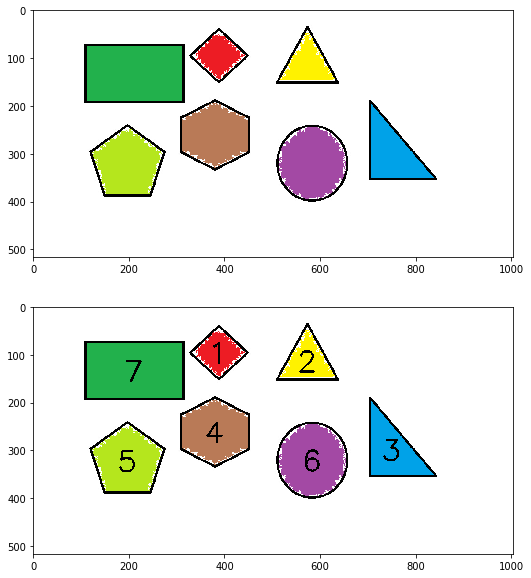

In [2]:
import cv2 as cv 
import numpy as np
import matplotlib.pyplot as plt

# Load the image and convert it to grayscale:
img = cv.imread("data/shape.png")
imgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
print(imgGray[400,600])
# Apply thresholding to get a binary image:
ret, threshImg = cv.threshold(imgGray, 50, 255, cv.THRESH_BINARY_INV)

# Find contours using the thresholded image:
contours, hierarchy = cv.findContours(threshImg, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

# number of detected contours:
print(f"detected contours: {len(contours)}")

# create list of tuple (size, shape) for each contour
# list of contour size
contours_sizes = [cv.contourArea(contour) for contour in contours]
# list of (size, contour)
size_shape_list = zip(contours_sizes, contours)
sorted_size_shape_list = sorted(size_shape_list)
# (contour_sizes, contours) = zip(*sorted_size_shape_list)

plt.figure(figsize=(10,10))

# BGR to RGB
imgRGB = img[:,:,::-1]
plt.subplot(211)
plt.imshow(imgRGB)

for i, (size, contour) in enumerate(sorted_size_shape_list):
    # Compute the moment of contour:
    M = cv.moments(contour)

    # The center or centroid can be calculated as follows:
    cX = int(M['m10'] / M['m00'])
    cY = int(M['m01'] / M['m00'])

    # Get the position to draw:    
    text = str(i + 1)
    fontFace = cv.FONT_HERSHEY_SIMPLEX
    fontScale = 2
    thickness = 3
    text_size = cv.getTextSize(text, fontFace, fontScale, thickness)[0]

    text_x = cX - text_size[0] / 2
    text_x = round(text_x)
    text_y = cY + text_size[1] / 2
    text_y = round(text_y)
    
    # Write the ordering of the shape on the center of shapes
    color = (0, 0, 0)
    cv.putText(img, text, (text_x, text_y), fontFace, fontScale, color, thickness)

# BGR to RGB
imgRGB = img[:,:,::-1]
plt.subplot(212)
plt.imshow(imgRGB)

plt.show()

255
detected contours: 6


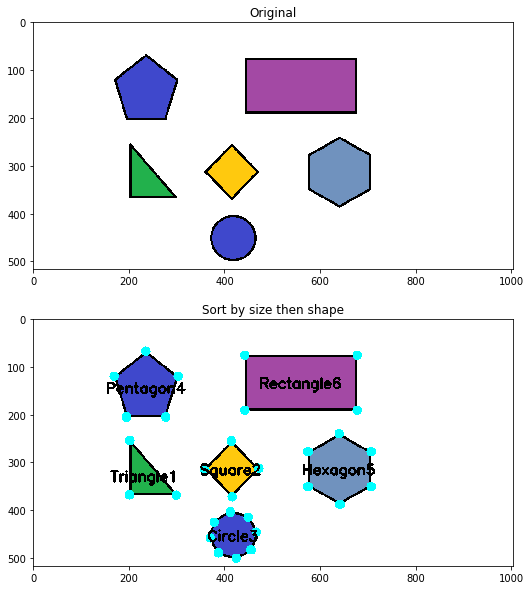

In [3]:
import cv2 as cv 
import numpy as np
import matplotlib.pyplot as plt       

# Load the image and convert it to grayscale:
img = cv.imread("data/shape2.png")
imgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
print(imgGray[400,600])
# Apply thresholding to get a binary image:
ret, threshImg = cv.threshold(imgGray, 50, 255, cv.THRESH_BINARY_INV)

# Find contours using the thresholded image:
contours, hierarchy = cv.findContours(threshImg, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

# number of detected contours:
print(f"detected contours: {len(contours)}")

# create list of tuple (size, shape) for each contour
# list of contour size
contours_sizes = [cv.contourArea(contour) for contour in contours]
# list of (size, contour)
size_shape_list = zip(contours_sizes, contours)
sorted_size_shape_list = sorted(size_shape_list)
# (contour_sizes, contours) = zip(*sorted_size_shape_list)

plt.figure(figsize=(10,10))

# BGR to RGB
imgRGB = img[:,:,::-1]
plt.subplot(211)
plt.imshow(imgRGB)
plt.title('Original')
imgApproxPolyDP = img.copy()
for i, (size, contour) in enumerate(sorted_size_shape_list):
    # Compute the moment of contour:
   

    perimeter = cv.arcLength(contour, True)
    epsilon = 0.03 * perimeter
    approxPolyDP = cv.approxPolyDP(contour, epsilon, True)

    
    color = (0, 255, 255)
    thickness = 5
    # draw line
    for approx in approxPolyDP:
        cv.drawContours(imgApproxPolyDP, [approx], 0, color, thickness)
    color = (255, 255, 0)
    thickness = 5
    # draw points
    for approx in [approxPolyDP]:
        # draw points
        squeeze = np.squeeze(approx)
        #print('contour:',approx.shape, squeeze.shape)
        
        for p in squeeze:
            pp = tuple(p.reshape(1, -1)[0])
            cv.circle(imgApproxPolyDP, pp, 10, color, -1)


    # determine shape   
    verticeNumber = len(approxPolyDP)
    if verticeNumber == 3:
        vertice_shape = (verticeNumber, 'Triangle')
    elif verticeNumber == 4:
        # get aspect ratio
        x, y, width, height = cv.boundingRect(approxPolyDP)
        aspectRatio = float(width) / height
        #print(aspectRatio)
        if 0.90 < aspectRatio < 1.1: 
            vertice_shape = (verticeNumber, 'Square')
        else:
            vertice_shape = (verticeNumber, 'Rectangle')
    elif verticeNumber == 5:
        vertice_shape = (verticeNumber, 'Pentagon')
    elif verticeNumber == 6:
        vertice_shape = (verticeNumber, 'Hexagon') 
    else:
        vertice_shape = (verticeNumber, 'Circle')
#     elif verticeNumber == 7:
#         vertice_shape = (verticeNumber, "Heptagon")
#     elif verticeNumber == 8:
#         vertice_shape = (verticeNumber, "Octagon")
#     elif verticeNumber == 9:
#         vertice_shape = (verticeNumber, "Nonagon")
#     elif verticeNumber == 10:
#         vertice_shape = (verticeNumber, "Decagon")
   
    
    # write shape
    # Compute the moment of contour:
    M = cv.moments(contour)

    # The center or centroid can be calculated as follows:
    cX = int(M['m10'] / M['m00'])
    cY = int(M['m01'] / M['m00'])

    # Get the position to draw:    
    text1 = vertice_shape[1]
    text2 = str(i + 1)
    text = text1 + text2
    fontFace = cv.FONT_HERSHEY_SIMPLEX
    fontScale = 1
    thickness = 3
    text_size = cv.getTextSize(text, fontFace, fontScale, thickness)[0]

    text_x = cX - text_size[0] / 2
    text_x = round(text_x)
    text_y = cY + text_size[1] / 2
    text_y = round(text_y)
    
    # Write the ordering of the shape on the center of shapes
    color = (0, 0, 0)
    cv.putText(imgApproxPolyDP, text, (text_x, text_y), fontFace, fontScale, color, thickness)
        
# BGR to RGB
imgRGB = imgApproxPolyDP[:,:,::-1]
plt.subplot(212)
plt.imshow(imgRGB)
plt.title('Sort by size then shape')

plt.tight_layout
plt.show()

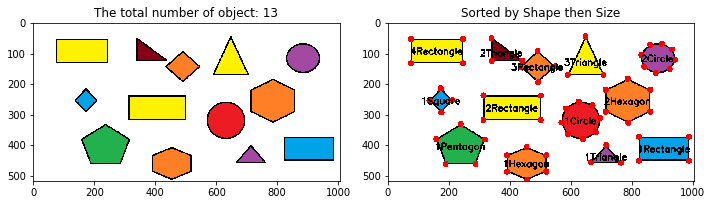

In [7]:
import cv2 as cv 
import numpy as np
import matplotlib.pyplot as plt

# Load the image and convert it to grayscale:
img = cv.imread('data/shape3.png')
imgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Apply thresholding to get a binary image:
ret, threshImg = cv.threshold(imgGray, 150, 255, cv.THRESH_BINARY_INV)

# Find contours using the thresholded image:
contours, hierarchy = cv.findContours(threshImg, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

plt.figure(figsize=(10,10))

imgRGB = img[:,:,::-1]
plt.subplot(121)
plt.title(f"The total number of object: {len(contours)}")
plt.imshow(imgRGB)

tri_count = 0
rect_count = 0
squ_count = 0
pen_count = 0
hex_count = 0
cir_count = 0

# approxPolyDP():
imgApproxPolyDP = img.copy()
for contour in contours:
    perimeter = cv.arcLength(contour, True)
    epsilon = 0.03 * perimeter
    approxPolyDP = cv.approxPolyDP(contour, epsilon, True)

    color = (255, 255, 0)
    thickness = 5
    
    # draw line
    for approx in approxPolyDP:
        cv.drawContours(imgApproxPolyDP, [approx], 0, color, thickness)
    color = (0, 0, 255)
    thickness = 5
    # draw points
    for approx in [approxPolyDP]:
        # draw points
        squeeze = np.squeeze(approx)
        #print('contour:',approx.shape, squeeze.shape)
        for p in squeeze:
            pp = tuple(p.reshape(1, -1)[0])
            cv.circle(imgApproxPolyDP, pp, 10, color, -1)
            
     # write shape
    # Compute the moment of contour:
    M = cv.moments(contour)

    # The center or centroid can be calculated as follows:
    cX = int(M['m10'] / M['m00'])
    cY = int(M['m01'] / M['m00'])
    # determine shape   
    verticeNumber = len(approxPolyDP)
    if verticeNumber == 3:
        vertice_shape = (verticeNumber, 'Triangle')

        tri_count+=1
        textTri = str(tri_count)
        textShape = vertice_shape[1]
        text1 = textTri + textShape
        fontFace = cv.FONT_HERSHEY_SIMPLEX
        fontScale = 1
        thickness = 3
        text_size = cv.getTextSize(text1, fontFace, fontScale, thickness)[0]

        text_x = cX - text_size[0] / 2
        text_x = round(text_x)
        text_y = cY + text_size[1] / 2
        text_y = round(text_y)
        
        # Write the ordering of the shape on the center of shapes
        color = (0, 0, 0)
        cv.putText(imgApproxPolyDP, text1, (text_x, text_y), fontFace, fontScale, color, thickness)
        
    elif verticeNumber == 4:
        # get aspect ratio
        x, y, width, height = cv.boundingRect(approxPolyDP)
        aspectRatio = float(width) / height
        #print(aspectRatio)
        if 0.90 < aspectRatio < 1.1: 
            vertice_shape = (verticeNumber, 'Square')

            squ_count+=1
            textSqu = str(squ_count)
            textShape = vertice_shape[1]
            text2 = textSqu + textShape
            fontFace = cv.FONT_HERSHEY_SIMPLEX
            fontScale = 1
            thickness = 3
            text_size = cv.getTextSize(text2, fontFace, fontScale, thickness)[0]

            text_x = cX - text_size[0] / 2
            text_x = round(text_x)
            text_y = cY + text_size[1] / 2
            text_y = round(text_y)
            
            # Write the ordering of the shape on the center of shapes
            color = (0, 0, 0)
            cv.putText(imgApproxPolyDP, text2, (text_x, text_y), fontFace, fontScale, color, thickness)
        else:
            vertice_shape = (verticeNumber, 'Rectangle')

            rect_count +=1
            textRect = str(rect_count)
            textShape = vertice_shape[1]
            text3 = textRect + textShape
            fontFace = cv.FONT_HERSHEY_SIMPLEX
            fontScale = 1
            thickness = 3
            text_size = cv.getTextSize(text3, fontFace, fontScale, thickness)[0]

            text_x = cX - text_size[0] / 2
            text_x = round(text_x)
            text_y = cY + text_size[1] / 2
            text_y = round(text_y)
            
            # Write the ordering of the shape on the center of shapes
            color = (0, 0, 0)
            cv.putText(imgApproxPolyDP, text3, (text_x, text_y), fontFace, fontScale, color, thickness)

    elif verticeNumber == 5:
        vertice_shape = (verticeNumber, 'Pentagon')

        pen_count +=1
        textPen = str(pen_count)
        textShape = vertice_shape[1]
        text4 = textPen + textShape
        fontFace = cv.FONT_HERSHEY_SIMPLEX
        fontScale = 1
        thickness = 3
        text_size = cv.getTextSize(text4, fontFace, fontScale, thickness)[0]

        text_x = cX - text_size[0] / 2
        text_x = round(text_x)
        text_y = cY + text_size[1] / 2
        text_y = round(text_y)
        
        # Write the ordering of the shape on the center of shapes
        color = (0, 0, 0)
        cv.putText(imgApproxPolyDP, text4, (text_x, text_y), fontFace, fontScale, color, thickness)

    elif verticeNumber == 6:
        vertice_shape = (verticeNumber, 'Hexagon')

        hex_count +=1
        textHex = str(hex_count)
        textShape = vertice_shape[1]
        text5 = textHex + textShape
        fontFace = cv.FONT_HERSHEY_SIMPLEX
        fontScale = 1
        thickness = 3
        text_size = cv.getTextSize(text5, fontFace, fontScale, thickness)[0]

        text_x = cX - text_size[0] / 2
        text_x = round(text_x)
        text_y = cY + text_size[1] / 2
        text_y = round(text_y)
        
        # Write the ordering of the shape on the center of shapes
        color = (0, 0, 0)
        cv.putText(imgApproxPolyDP, text5, (text_x, text_y), fontFace, fontScale, color, thickness)

    else:
        vertice_shape = (verticeNumber, 'Circle')

        cir_count +=1
        textCir = str(cir_count)
        textShape = vertice_shape[1]
        text5 = textCir + textShape
        fontFace = cv.FONT_HERSHEY_SIMPLEX
        fontScale = 1
        thickness = 3
        text_size = cv.getTextSize(text5, fontFace, fontScale, thickness)[0]

        text_x = cX - text_size[0] / 2
        text_x = round(text_x)
        text_y = cY + text_size[1] / 2
        text_y = round(text_y)
        
        # Write the ordering of the shape on the center of shapes
        color = (0, 0, 0)
        cv.putText(imgApproxPolyDP, text5, (text_x, text_y), fontFace, fontScale, color, thickness)


imgRGB = imgApproxPolyDP[:,:,::-1]
plt.subplot(122)
plt.title("Sorted by Shape then Size")
plt.imshow(imgRGB)

plt.tight_layout()
plt.show()


In [8]:
import sys
import cv2 as cv
import numpy as np


# Load image:
image = cv.imread('data/shape3.png')
#convert image into greyscale mode
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

#find threshold of the image
_, thrash = cv.threshold(gray_image, 240, 255, cv.THRESH_BINARY)
contours, _ = cv.findContours(thrash, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)


def find_sqr_rect(image): 
    for contour in contours:
        shape = cv.approxPolyDP(contour, 0.02*cv.arcLength(contour, True), True)
        x_cor = shape.ravel()[0]
        y_cor = shape.ravel()[1]
        
        if len(shape) ==4:
            #shape cordinates
            x,y,w,h = cv.boundingRect(shape)

            #width:height
            aspectRatio = float(w)/h
            cv.drawContours(image, [shape], 0, (0,255,0), 4)
            if aspectRatio >= 0.9 and aspectRatio <=1.1:
                cv.putText(image, "Square", (x_cor, y_cor), cv.FONT_HERSHEY_COMPLEX, 0.5, (0,0,0))
            else:
                cv.putText(image, "Rectangle", (x_cor, y_cor), cv.FONT_HERSHEY_COMPLEX, 0.5, (255,0,0))
            
    cv.imshow("Square and Rectangles", image)
    cv.waitKey(0)
    cv.destroyAllWindows()

def find_triangle(image):
    for contour in contours:
        shape = cv.approxPolyDP(contour, 0.02*cv.arcLength(contour, True), True)
        x_cor = shape.ravel()[0]
        y_cor = shape.ravel()[1]

        #For triangle
        if len(shape) ==3:
            cv.drawContours(image, [shape], 0, (0,255,0), 4)
            cv.putText(image, "Triangle", (x_cor, y_cor), cv.FONT_HERSHEY_COMPLEX, 0.5, (0,0,0))

                 
    cv.imshow("Triangles", image)
    cv.waitKey(0)
    cv.destroyAllWindows()

def find_pentagon(image):
    for contour in contours:
        shape = cv.approxPolyDP(contour, 0.02*cv.arcLength(contour, True), True)
        x_cor = shape.ravel()[0]
        y_cor = shape.ravel()[1]

        #For pentagon
        if len(shape) ==5:
            cv.drawContours(image, [shape], 0, (0,255,0), 4)
            cv.putText(image, "Pentagon", (x_cor, y_cor), cv.FONT_HERSHEY_COMPLEX, 0.5, (0,0,0))

                 
    cv.imshow("Pentagon", image)
    cv.waitKey(0)
    cv.destroyAllWindows()

def find_circle(image):
    for contour in contours:
        shape = cv.approxPolyDP(contour, 0.01*cv.arcLength(contour, True), True)
        x_cor = shape.ravel()[0]
        y_cor = shape.ravel()[1]-15
        
        if len(shape) >12:
            cv.drawContours(image, [shape], 0, (0,255,0), 4)
            cv.putText(image, "Circle", (x_cor, y_cor), cv.FONT_HERSHEY_COMPLEX, 0.5, (0,0,0))

                 
    cv.imshow("circle", image)
    cv.waitKey(0)
    cv.destroyAllWindows()

def find_hexagon(image):
    for contour in contours:
        shape = cv.approxPolyDP(contour, 0.01*cv.arcLength(contour, True), True)
        x_cor = shape.ravel()[0]
        y_cor = shape.ravel()[1]
        
        if len(shape) == 6:
            cv.drawContours(image, [shape], 0, (0,255,0), 4)
            cv.putText(image, "Hexagon", (x_cor, y_cor), cv.FONT_HERSHEY_COMPLEX, 0.5, (0,0,0))

                 
    cv.imshow("Hexagon", image)
    cv.waitKey(0)
    cv.destroyAllWindows()

if __name__ == "__main__":
    img = image.copy()
    user_input = input("""Options:
                        a : to classify Squares and Rectangles\n 
                        b : to classify Triangles\n  
                        c : to classify Pentagons\n
                        d : to classify Cirles\n
                        e : to classify Hexagon\n

                        Answer: """)

    if user_input == 'a' :
        find_sqr_rect(img)
    elif user_input == 'b':
        find_triangle(img)
    elif user_input == 'c':
        find_pentagon(img)
    elif user_input == 'd':
        find_circle(img)
    elif user_input == 'e':
        find_hexagon(img)

        


Options:
                        a : to classify Squares and Rectangles
 
                        b : to classify Triangles
  
                        c : to classify Pentagons

                        d : to classify Cirles

                        e : to classify Hexagon


                        Answer: e


In [ ]:
import cv2

image= cv2.imread('data/shape3.png')
original_image= image

gray= cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

edged= cv2.Canny(gray, 50,200)

contours, hierarchy= cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)


cv2.imshow('Original Image', image)
cv2.waitKey(0)


cv2.destroyAllWindows()


def get_contour_areas(contours):

    all_areas= []

    for cnt in contours:
        area= cv2.contourArea(cnt)
        all_areas.append(area)

    return all_areas



print ("Contour Areas before Sorting", get_contour_areas(contours))

sorted_contours= sorted(contours, key=cv2.contourArea, reverse= True)

print ("Contour Areas after Sorting", get_contour_areas(sorted_contours))


for c in sorted_contours:
    cv2.drawContours(original_image, [c], -1, (255,0,0),10)
    cv2.waitKey(0)
    cv2.imshow('Contours By Area', original_image)


cv2.waitKey(0)
cv2.destroyAllWindows()
